#IMPORTING THE LIBRARIES

In [148]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import RobustScaler, OneHotEncoder
## for explainer
from lime import lime_tabular

#Reading the Dataset

In [149]:
col_names = ["symboling", "normalized-losses", "make",
             "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
             "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
             "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore",
             "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

dtf = pd.read_csv("data.csv", header=None, names=col_names)

#Data Analysis
##Exploratory Data Analysis (EDA)

1. Exploratory data analysis (EDA) is a statistical method used to summarize and understand the main features of a dataset  
2. It involves getting an overview of the dataset by identifying the number of categorical and numerical variables and the proportion of missing data.
3. Recognizing the type of variable can be challenging because categories can be expressed as numbers. 


```
Example in gender-  'male' could be represented as 0 'female' as 1. 
Through human perception we know that this column represents categorical variables/ information and not numerical data.
```

A function that can help differentiate between numerical and categorical columns

```
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
```

In [150]:
#Find out the data type of your Columns
dtf.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [151]:
#Finding out the unique values in categorical (datatype=object) columns
'''Example: 'make' '''

print('There are ', dtf['make'].nunique() ,' unique values in the MAKE Column')

There are  22  unique values in the MAKE Column


In [152]:
# identify categorical variables
cat_vars = dtf.select_dtypes(include=['object']).columns
print(cat_vars)

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')


In [153]:
#Similarly let us find this information from other Categorical Columns

# identify categorical variables
cat_vars = dtf.select_dtypes(include=['object']).columns

# loop through categorical variables and print unique values
for var in cat_vars:
    print(f"Unique values for {var}:\n{dtf[var].unique()}\n")

Unique values for normalized-losses:
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Unique values for make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values for fuel-type:
['gas' 'diesel']

Unique values for aspiration:
['std' 'turbo']

Unique values for num-of-doors:
['two' 'four' '?']

Unique values for body-style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values for drive-wheels:
['rwd' 'fwd' '4wd']

Unique values for engine-location:
['front' 'rear']

Unique values for engine-type:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


What can we infer from this?
```
The columns: 
normalized-losses
bore
stroke
horsepower
peak-rpm
price
```
are numerical/continuous columns and not categorical columns

So, our next step is to convert them to numerical columns.
But before we do this, there might be some values like ```?```
or ```special characters``` filled in the columns that we need to eliminate.

```Observe the unique values in the above output carefully```

In [154]:
#This line of code replaces the special character '?' with 'NaN' in all rows across all columns
# NaN stands for Not a Number. 
'''
NaN stands for "Not a Number" and it is a special floating-point value used to represent missing or undefined 
values in numerical computations. It can occur as a result of invalid mathematical operations,
undefined values in functions or simply missing data in datasets.
'''
dtf.replace("?", float("NaN"), inplace=True)

#So, when we use to_numeric() we will not run into ValueError

In [155]:
cat_num_cols=['normalized-losses',
'bore',
'stroke',
'horsepower',
'peak-rpm',
'price']
for num_col in cat_num_cols:
  dtf[num_col]=pd.to_numeric(dtf[num_col])

```
max_cat=25 was chosen because 'make' column has the highest number of unique values (22 unique values)
```

In [156]:
def utils_recognize_type(dtf, col, max_cat=25):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

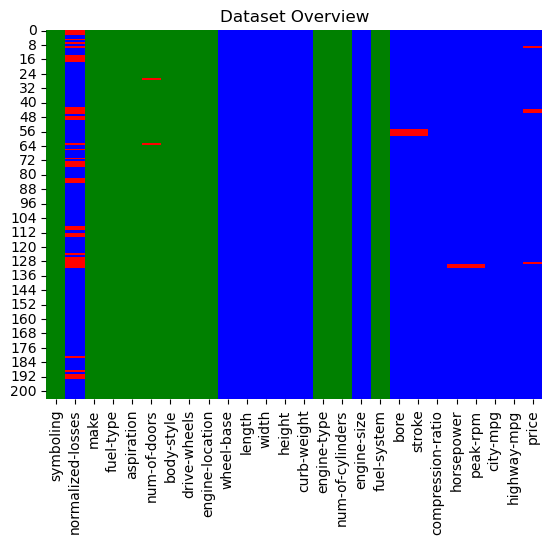

 Categorical   Numeric   NaN 


In [157]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False, cmap=['green', 'blue', 'red']).set_title('Dataset Overview')
plt.show()
print("\033[1;32m Categorical \033[0m", "\033[1;34m Numeric \033[0m", "\033[1;31m NaN \033[0m")


What can you infer from the above heatmap?
The Categorical Columns are shown in green, Numerical columns are shown in blue and the null values in the columns are shown in red.

normalized-losses has many NaN values in it

In [158]:
#Printing first Five rows of the dataset
dtf.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


#Taking Care of missing Values

In [159]:
#Checking if there are null values present
# Check for empty values in any column
print(dtf.isna().any())

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool


In [160]:
# replace the values in the 'fuel-type' column
dtf['fuel-type'] = dtf['fuel-type'].replace({'gas': 0, 'diesel': 1})
# dtf['num-of-doors'] = dtf['num-of-doors'].replace({'two': 2, 'four': 4})
dtf['num-of-doors'].fillna('2', inplace=True)
bore_mean = dtf['bore'].mean()
dtf['bore'].fillna(bore_mean, inplace=True)
stroke_mean = dtf['stroke'].mean()
dtf['stroke'].fillna(stroke_mean, inplace=True)
peak_rpm_mean = dtf['peak-rpm'].mean()
dtf['peak-rpm'].fillna(peak_rpm_mean, inplace=True)
norm_loss_mean = dtf['normalized-losses'].mean()
dtf['normalized-losses'].fillna(norm_loss_mean, inplace=True)
price_mean = dtf['price'].mean()
dtf['price'].fillna(price_mean, inplace=True)

In [161]:
#Replace empty values in ```horsepower``` column with the mean of the column
# Calculate the mean of horsepower column
mean_hp = dtf['horsepower'].mean()

# Replace empty values with mean
dtf['horsepower'].fillna(mean_hp, inplace=True)


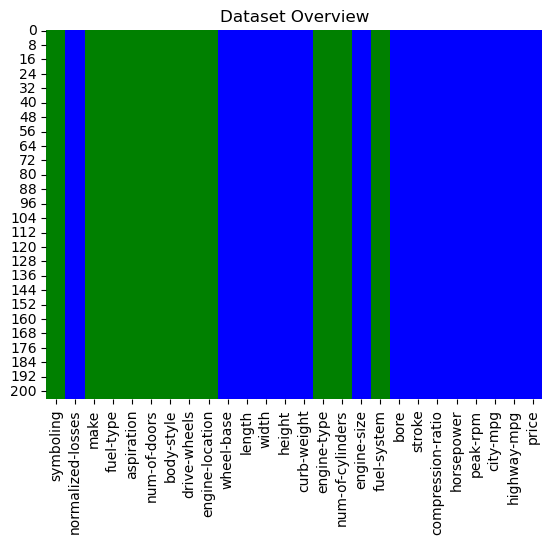

 Categorical   Numeric   NaN 


In [162]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False, cmap=['green', 'blue']).set_title('Dataset Overview')
plt.show()
print("\033[1;32m Categorical \033[0m", "\033[1;34m Numeric \033[0m", "\033[1;31m NaN \033[0m")


In [163]:
#Checking if there are null values present
# Check for empty values in any column
print(dtf.isna().any())

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool


#Data Visualization

Visualization is the best tool for data analysis, but we need to know what kind of plots are more suitable for the different types of variables. 

First, let’s have a look at the univariate distributions (probability distribution of just one variable). A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data. I recommend using a box plot to graphically depict data groups through their quartiles. For example, let’s plot the target variable:

##Finding out the distribution of price (dependent variable)

/var/folders/j4/_pb6nwx50lv4ghbgx_z6xcmh0000gn/T/ipykernel_49530/1420969099.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/Users/mayanktamakuwala/miniforge3/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


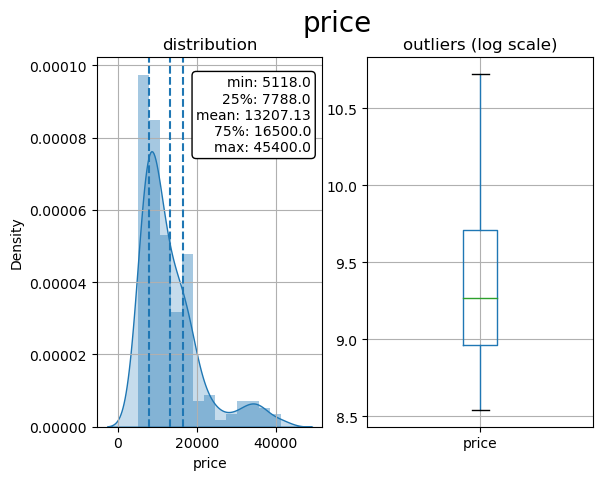

In [164]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

For fuel-type:
```
'gas' is encoded as 0

'diesel' is encoded as 1
```

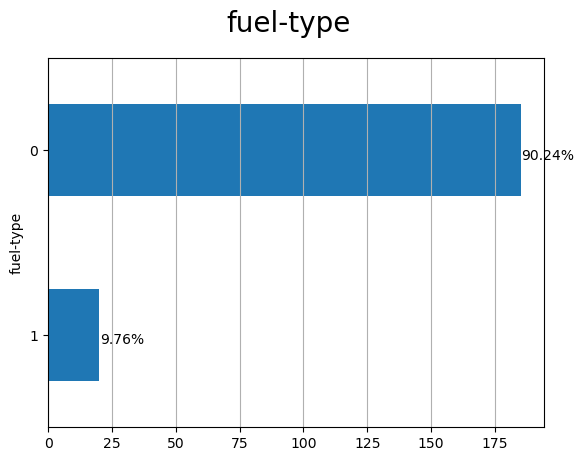

In [165]:
x = "fuel-type"

ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

/var/folders/j4/_pb6nwx50lv4ghbgx_z6xcmh0000gn/T/ipykernel_49530/1474712351.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group_data[num], hist=False, label=group_name, ax=ax[0])
/var/folders/j4/_pb6nwx50lv4ghbgx_z6xcmh0000gn/T/ipykernel_49530/1474712351.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

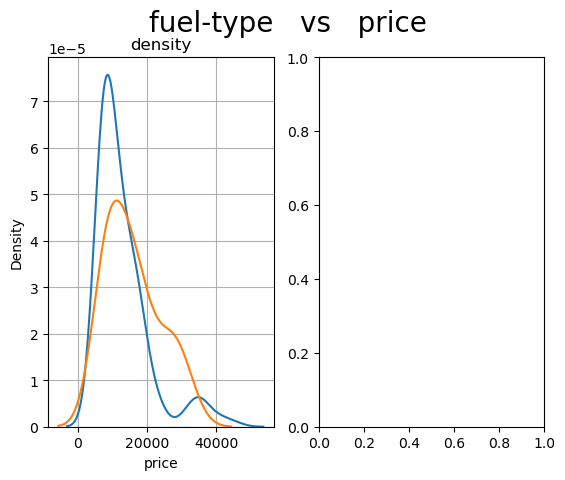

In [166]:
cat, num = "fuel-type", "price"
y=num
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)

### distribution           
ax[0].title.set_text('density')
for group_name, group_data in dtf.groupby(cat):
    sns.distplot(group_data[num], hist=False, label=group_name, ax=ax[0])
ax[0].grid(True)


/Users/mayanktamakuwala/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


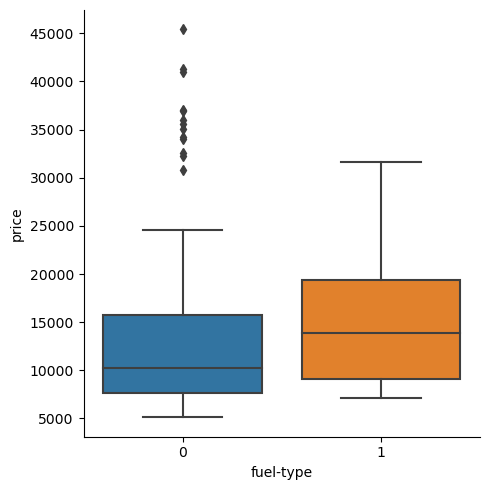

In [167]:
### boxplot   
ax[1].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[1])
ax[1].grid(True)
plt.show()

##Relationship Between fuel-type and price using ANOVA Test

In [168]:
# rename a column
dtf = dtf.rename(columns={'fuel-type': 'fuel_type'})
cat, num = "fuel_type", "price"
model = smf.ols(num+' ~ '+cat,data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Non-Correlated (p-value: 0.116)


##Relationship Between horsepower VS price

In [169]:
# #As observed above ```horsepower``` and ```price ``` have null values
# # drop the rows which have null values in column 'price'
# dtf = dtf.dropna(subset=['price'])

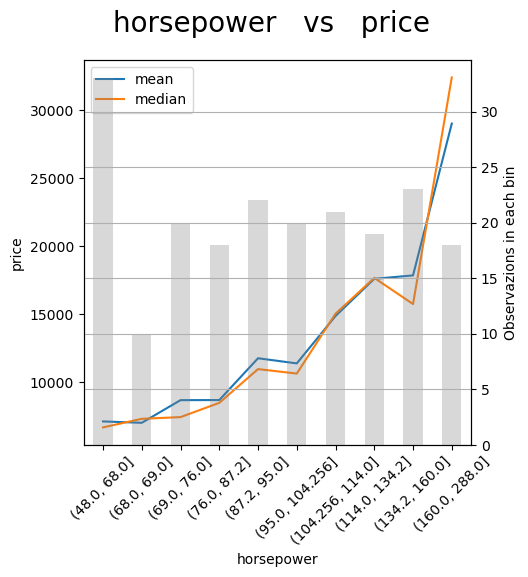

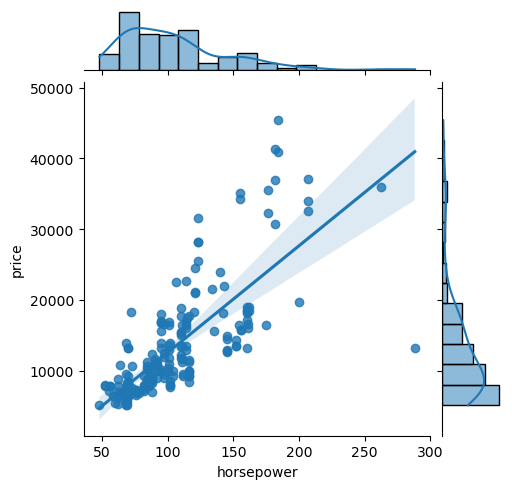

In [170]:
x, y = "horsepower", "price"
figsize=(5, 5)
### bin plot
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

Inference: 
```
Here the variables are horsepower and price
Assuming that two variables are independent (null hypothesis),it tests whether two samples have a linear relationship. If the p-value is small enough (<0.05), the null hypothesis can be rejected and we can say that the two variables are probably dependent.

A Pearson correlation coefficient of 0.81 indicates a strong positive correlation between two variables. This means that as one variable increases, the other variable tends to increase as well. 

So as horsepower for an automobile increases, price increases as well. 

So, the variable horsepower is useful in predicting price
```

##Relationship Between horsepower and price using Pearson Coefficient

In [171]:
x, y = "horsepower", "price"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.758 Significant (p-value: 0.0)


##Relationship Between horsepower and price using Pearson Coefficient

```normalized-losses```
column does not have the predictive power when compared to ```horsepower```, so we can drop ```normalized-losses``` column

In [172]:
x, y = "normalized-losses", "price"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.134 Non-Significant (p-value: 0.055)


#Feature Engineering

Taking a closer look at ```make``` column.
It has 22 unique categorical values. This might give rise to the ```curse of dimensionality``` problem

Let us try to use feature engineering.

I will bring down the value from 22 values to 3 values by employing the following code described below

I plot  box plots and figure of mean, max and min clusters and group them and create a new column called ```make_clusters``` and drop the original column ```make```

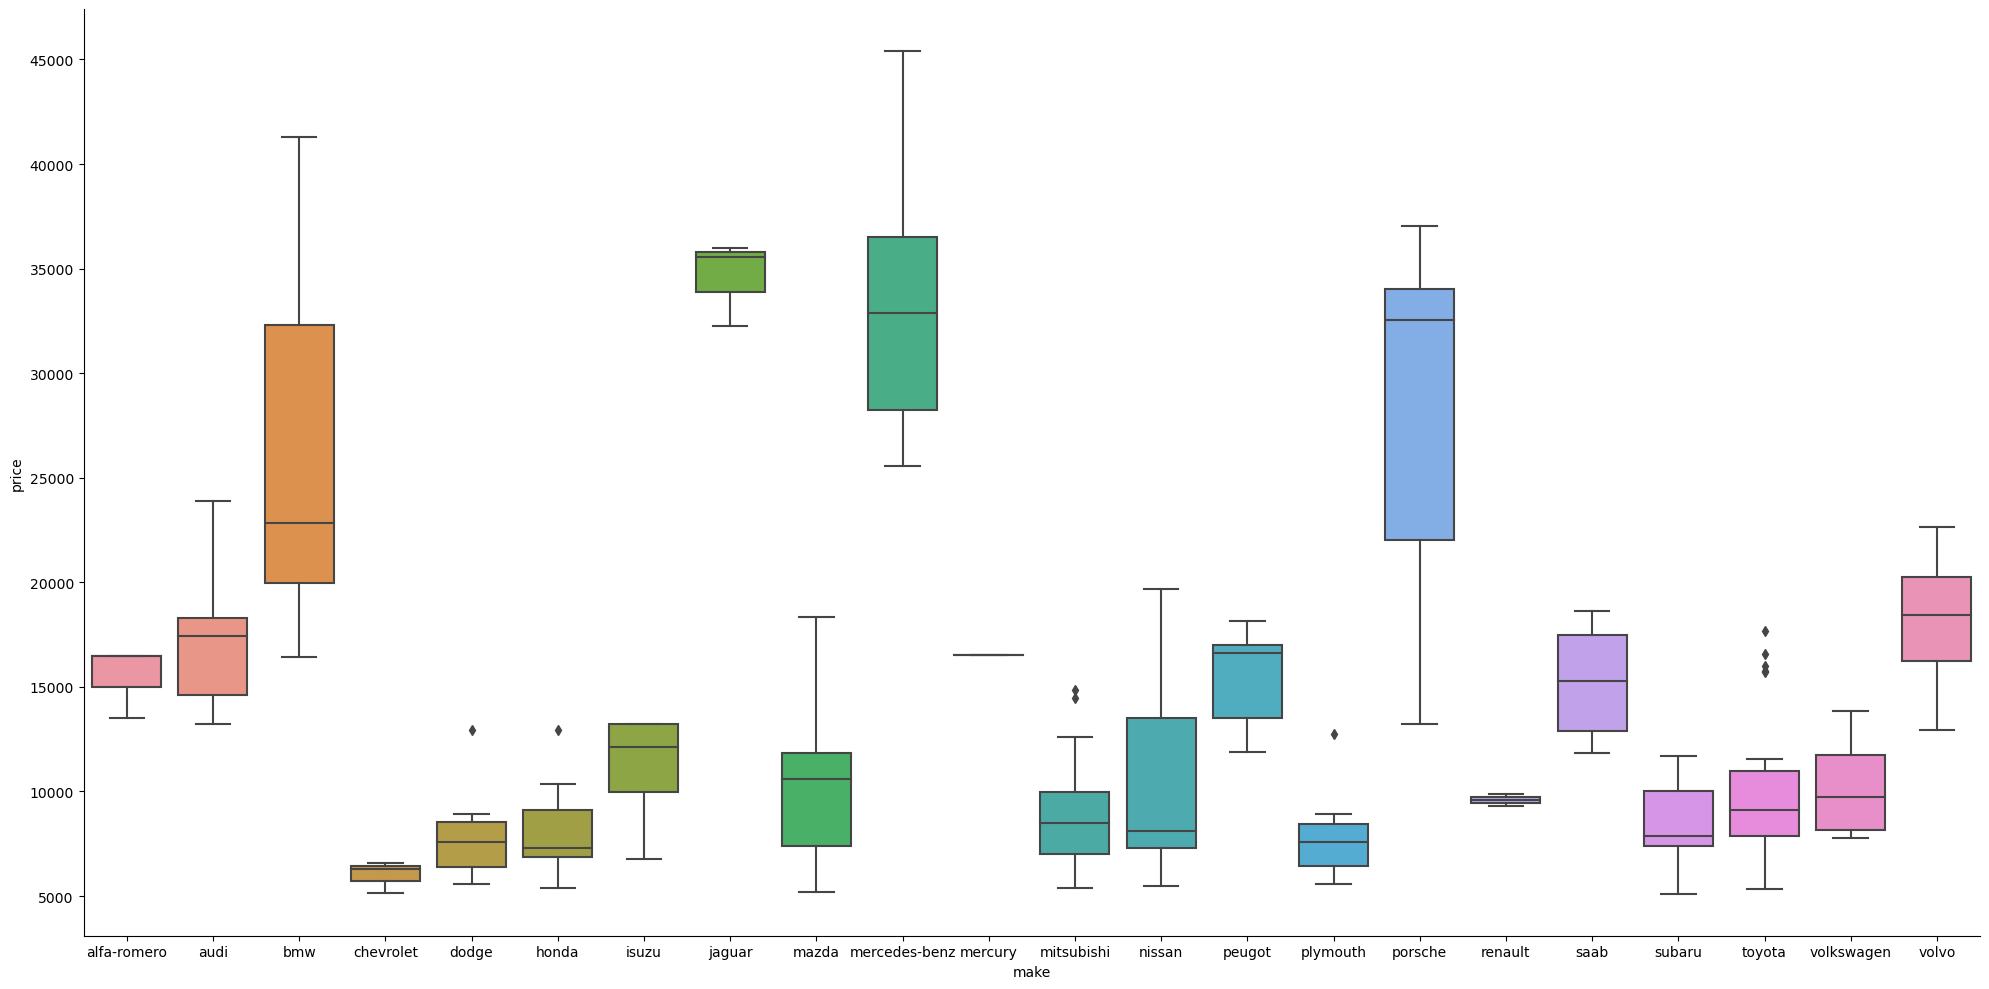

In [173]:
sns.catplot(x="make", y="price", data=dtf, kind="box", height=10, aspect=2)

In [174]:
## define clusters
x="make"
make_clusters = {"min":['chevrolet','plymouth','dodge'], "max":['bmw','mercedes-benz','porche','jaguar'], "mean":[]}
## create new columns
dic_flat = {v:k for k,lst in make_clusters.items() for v in lst}
for k,v in make_clusters.items():
    if len(v)==0:
        residual_class = k 
dtf[x+"_cluster"] = dtf[x].apply(lambda x: dic_flat[x] if x in 
                          dic_flat.keys() else residual_class)
## print
dtf[["make","make_cluster","price"]].head()

,make,make_cluster,price
0,alfa-romero,mean,13495.0
1,alfa-romero,mean,16500.0
2,alfa-romero,mean,16500.0
3,audi,mean,13950.0
4,audi,mean,17450.0


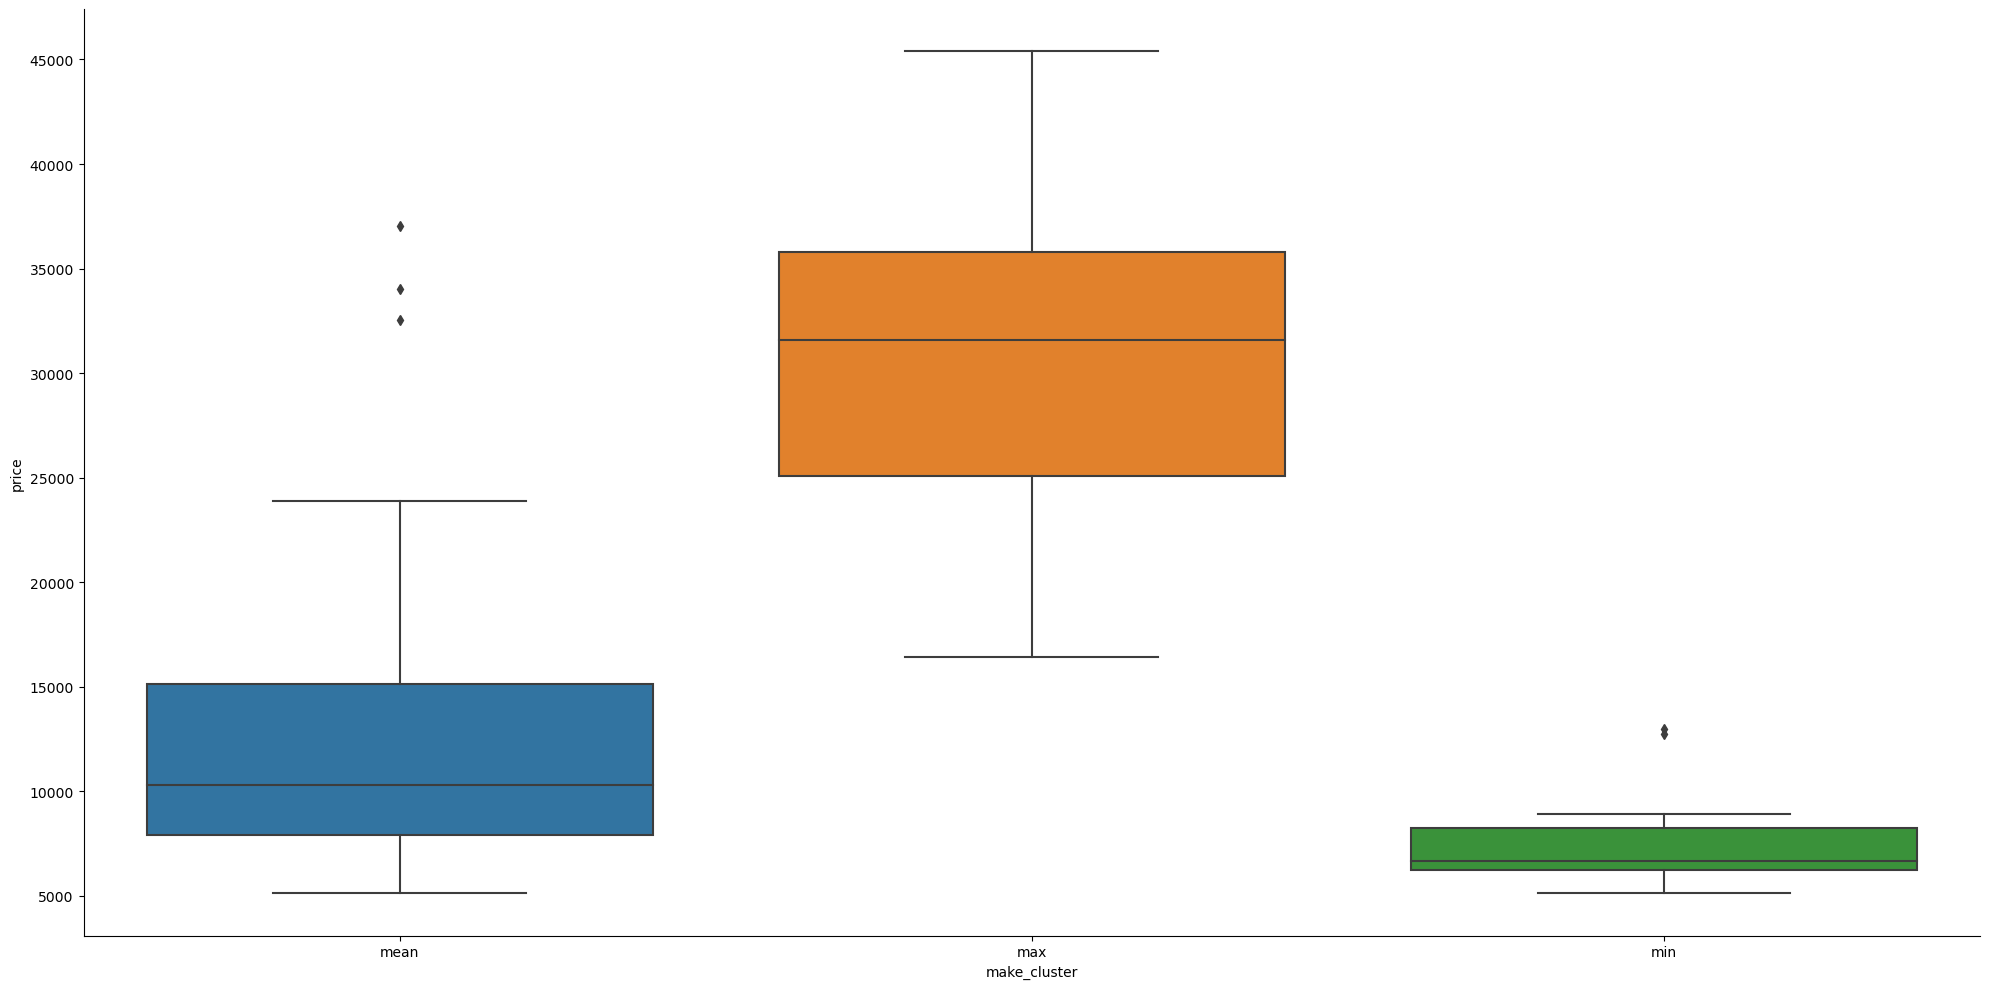

In [175]:
sns.catplot(x="make_cluster", y="price", data=dtf, kind="box", height=10, aspect=2)

Encoding the make_cluster column

Encoding the body_style column

In [176]:
cat_cols=['aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'make_cluster']

In [177]:
for cat_col in cat_cols:
  dummy = pd.get_dummies(dtf[cat_col], prefix=cat_col,drop_first=True)
  dtf= pd.concat([dtf, dummy], axis=1)
  print( dtf.filter(like=cat_col,axis=1).head() )
  ## drop the original categorical column
  dtf = dtf.drop(cat_col, axis=1)


  aspiration  aspiration_turbo
0        std             False
1        std             False
2        std             False
3        std             False
4        std             False
  num-of-doors  num-of-doors_four  num-of-doors_two
0          two              False              True
1          two              False              True
2          two              False              True
3         four               True             False
4         four               True             False
    body-style  body-style_hardtop  body-style_hatchback  body-style_sedan   
0  convertible               False                 False             False  \
1  convertible               False                 False             False   
2    hatchback               False                  True             False   
3        sedan               False                 False              True   
4        sedan               False                 False              True   

   body-style_wagon  
0          

In [178]:
dtf.dtypes



symboling                    int64
normalized-losses          float64
make                        object
fuel_type                    int64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                 float64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                      float64
aspiration_turbo              bool
num-of-doors_four             bool
num-of-doors_two              bool
body-style_hardtop            bool
body-style_hatchback          bool
body-style_sedan              bool
body-style_wagon              bool
drive-wheels_fwd              bool
drive-wheels_rwd              bool
engine-location_rear          bool
engine-type_dohcv   

#Dropping Columns after feature engineering and analyzing them

Here I will drop ```make``` and ```normalized-losses``` column

I have given the reasoning as to why I did it in the above cells.

Similarly, you can do the same with the other features.
Keep them or toss them depending on the analysis

I am choosing which features to drop and which ones to keep. This process is called ```feature selection```

In [179]:
dtf = dtf.drop(columns=['make'])

In [180]:
dtf = dtf.drop(columns=['normalized-losses'])

In [181]:
dtf.head()

,symboling,fuel_type,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,make_cluster_mean,make_cluster_min
0,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,True,False,False,True,False
1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,True,False,False,True,False
2,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,True,False,False,True,False
3,2,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,True,False,False,True,False
4,2,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,True,False,False,True,False


In the preprocessing step we do:

1. Partioning Dataset into training and Testing
2. Taking care of missing values
3. Encoding the categorical variables
4. Scaling the values

Note that 1,2,3,4 is not a Rigid Order.

We already took care of point 2.
Let us encode our categorical Variables
Then split the dataset into training and testing and then atlast perform scaling


#Splitting Dataset

In [182]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("price",axis=1).shape, "| X_test shape:", dtf_test.drop("price",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["price"]),2), "| y_test mean:", round(np.mean(dtf_test["price"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("price",axis=1).columns.to_list())

X_train shape: (143, 46) | X_test shape: (62, 46)
y_train mean: 13521.91 | y_test mean: 12481.11
47 features: ['symboling', 'fuel_type', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_rear', 'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six', 'num-of-cylinders_three', 'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi', 'make_cluster_mean', 'make_cluster_min']


# Scaling the values

In [183]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("price", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("price", 
                        axis=1).columns, index=dtf_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled[y] = scalerY.fit_transform(
                    dtf_train[y].values.reshape(-1,1))
dtf_scaled.head()

,symboling,fuel_type,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,make_cluster_mean,make_cluster_min,price
163,0.0,0.0,-0.333333,-0.236453,-0.483871,-0.405405,-0.354180,-0.458333,-0.258065,-0.827586,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.317340
179,1.0,0.0,0.666667,0.492611,0.709677,-0.567568,0.694737,1.062500,-0.086022,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555427
69,-0.5,1.0,1.119048,0.689655,1.548387,0.216216,1.287926,1.312500,0.580645,1.275862,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.894037
142,-0.5,0.0,-0.011905,-0.073892,-0.032258,-0.432432,-0.328173,-0.250000,0.666667,-2.172414,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.348447
96,0.0,0.0,-0.333333,-0.403941,-0.548387,0.108108,-0.599381,-0.479167,-0.344086,0.068966,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.378785


#Feature Selection

Feature selection is the process of selecting a subset of relevant variables to build the machine learning model. It makes the model easier to interpret and reduces overfitting 

Multicollinearity problem: refers to a situation in which two or more explanatory variables (independent variables) in a multiple regression model are highly linearly related.

Text(0.5, 1.0, 'pearson correlation')

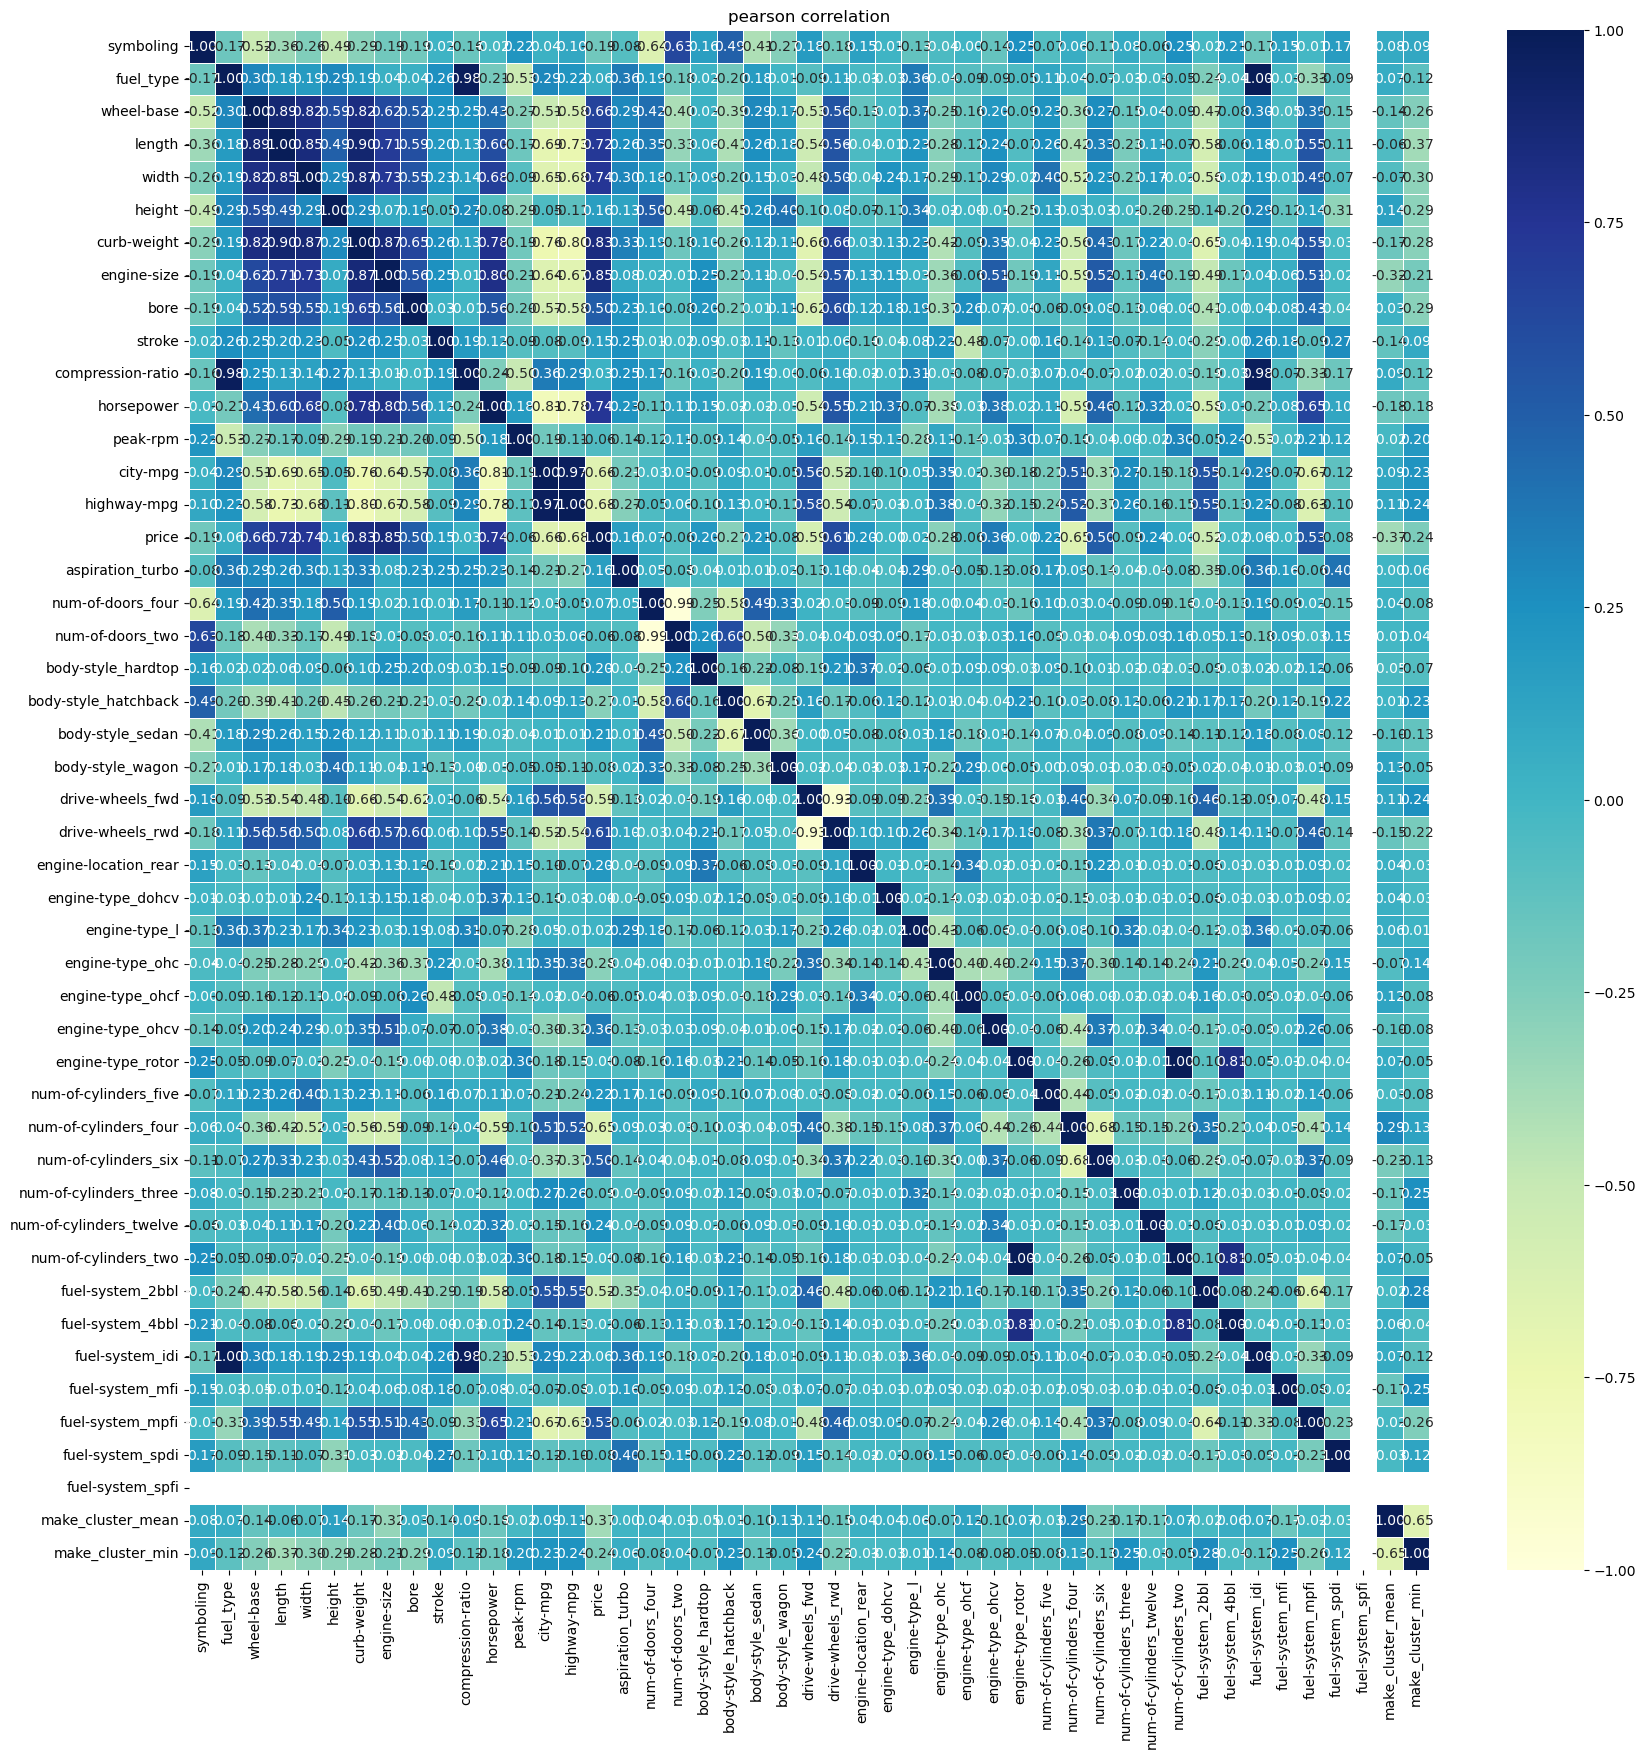

In [184]:
corr_matrix = dtf_train.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)
plt.title("pearson correlation")

<Axes: xlabel='selection', ylabel='features'>

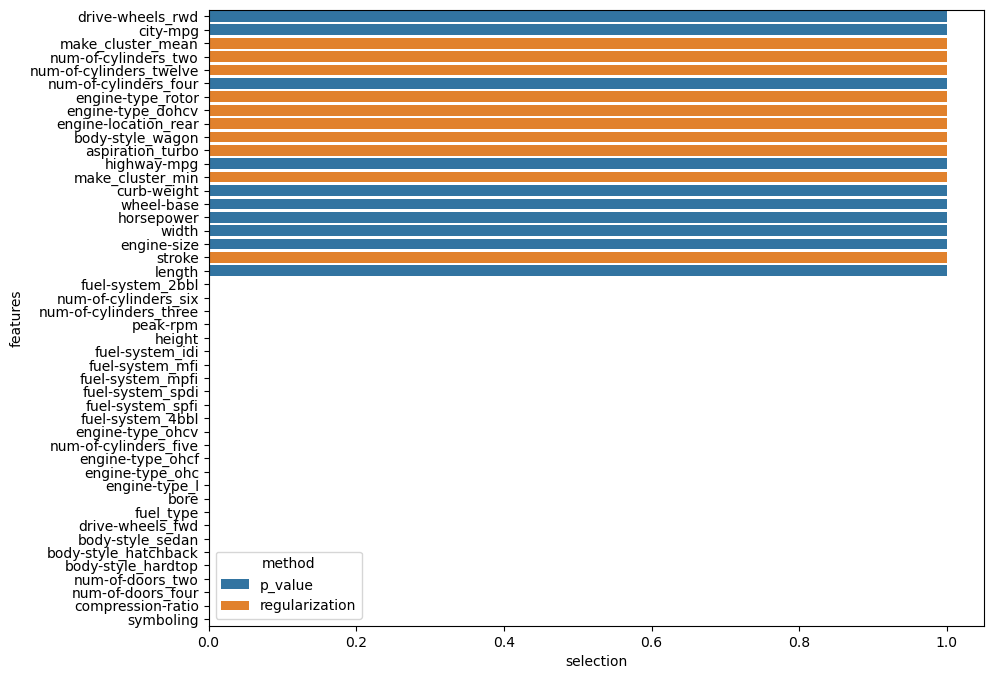

In [185]:
X = dtf_train.drop("price", axis=1).values
y = dtf_train["price"].values
feature_names = dtf_train.drop("price", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False, ax=ax)

Feature Importance

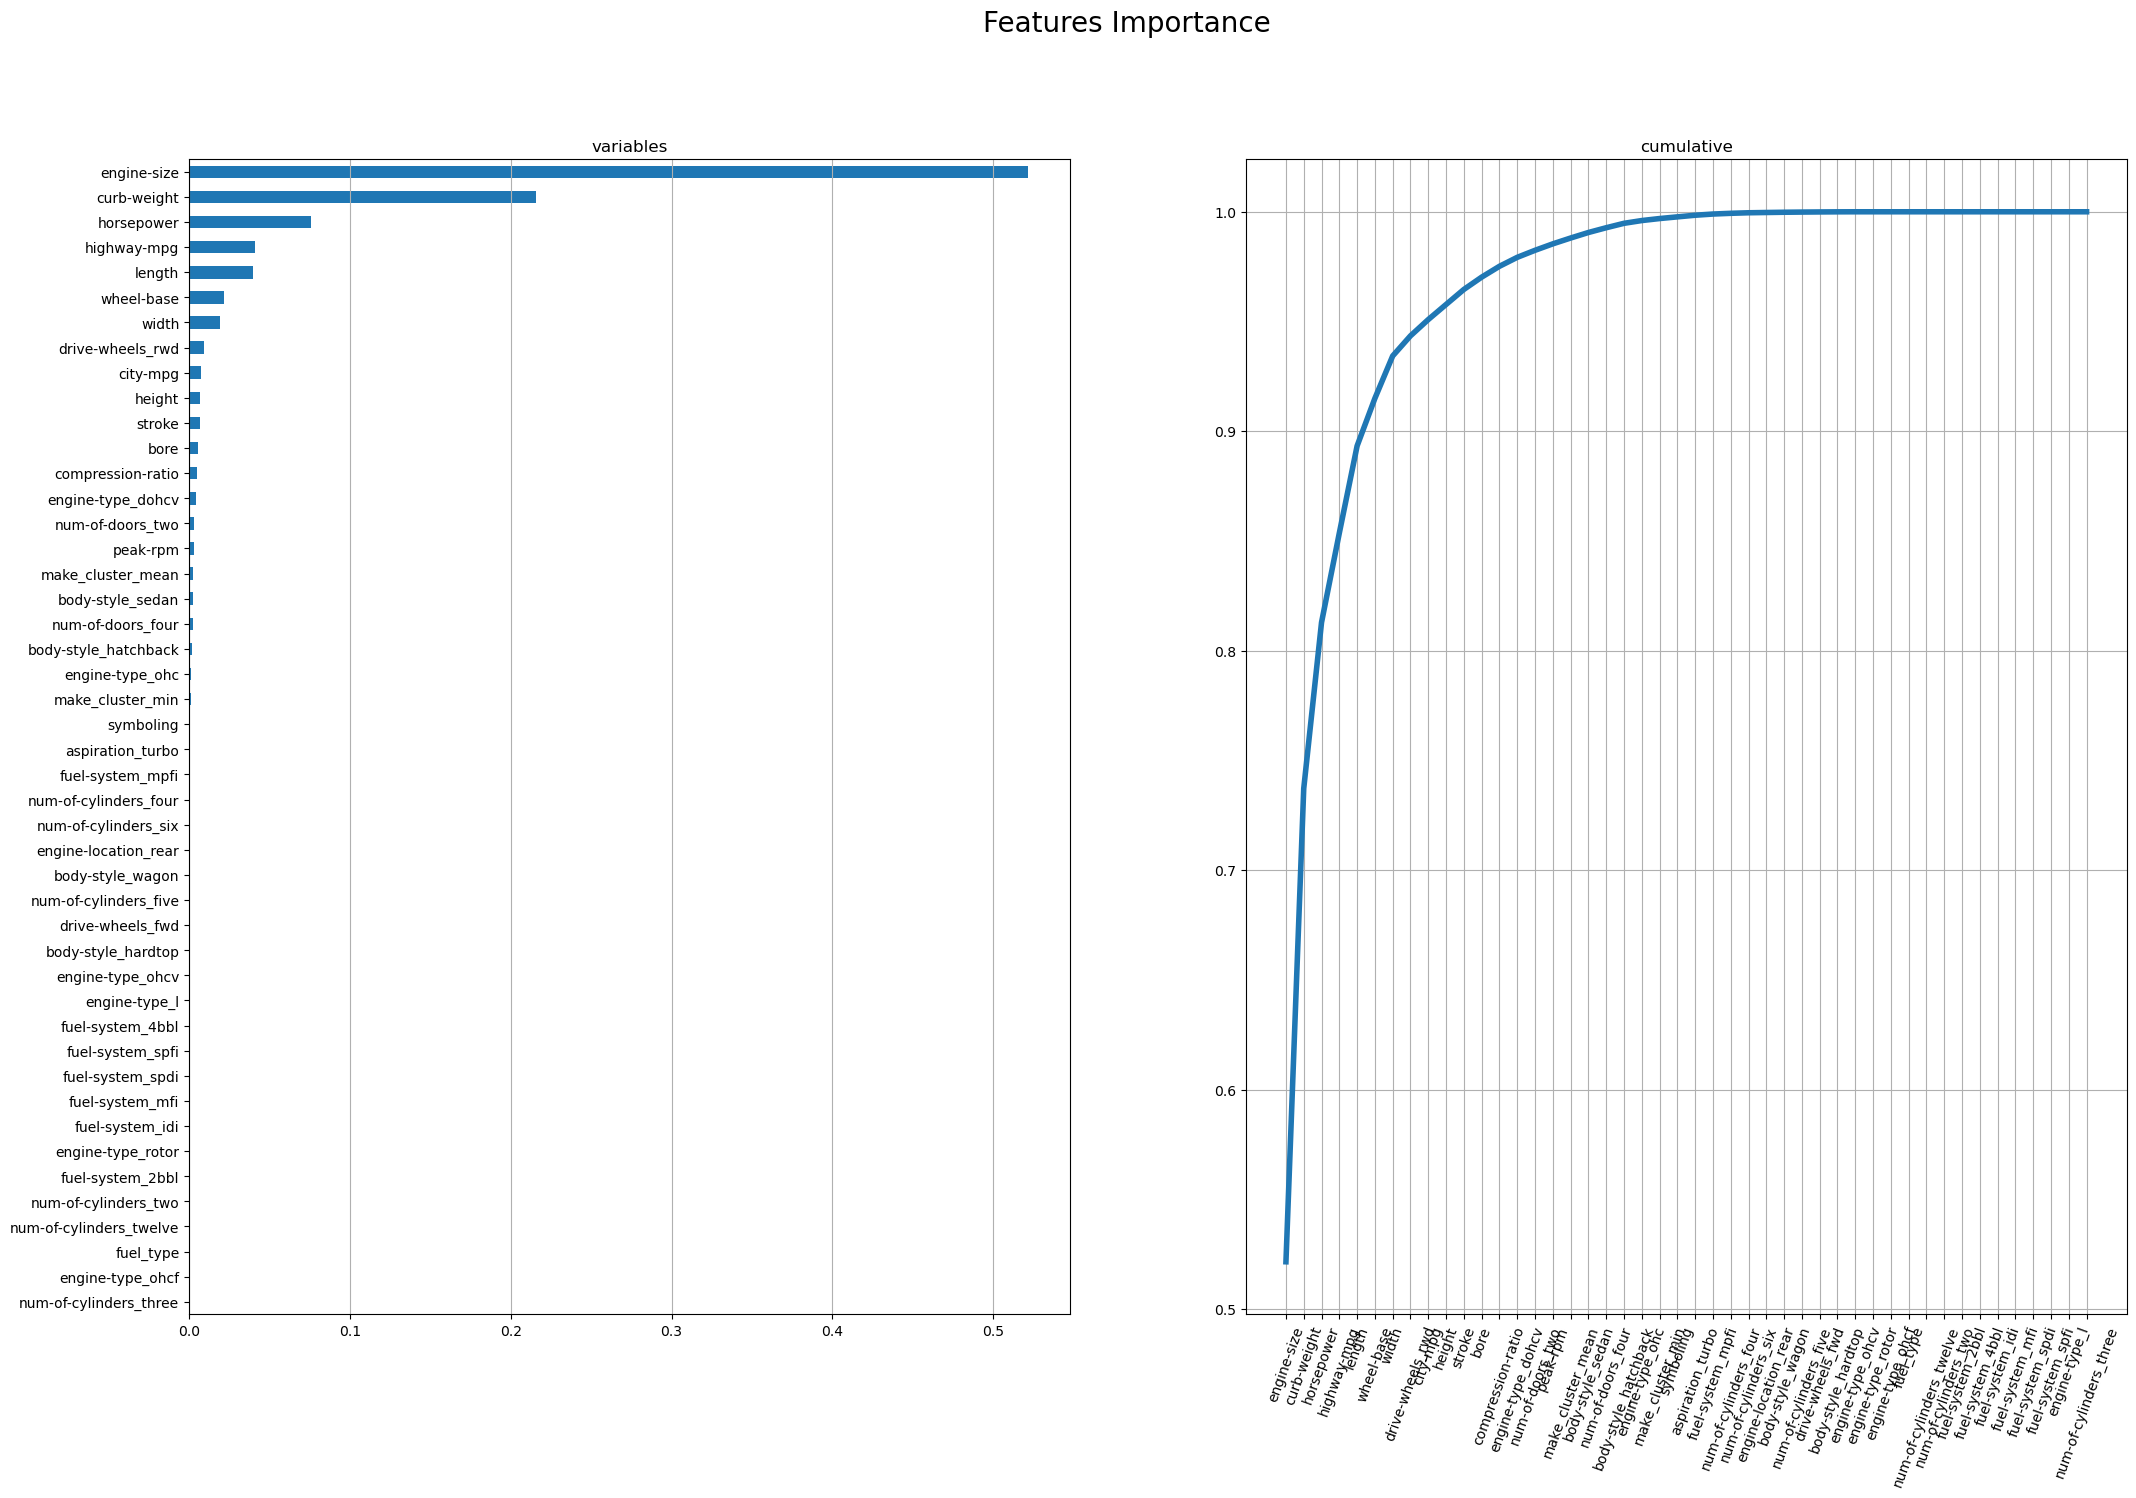

In [186]:
X = dtf_train.drop("price", axis=1).values
y = dtf_train["price"].values
feature_names = dtf_train.drop("price", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(25, 15))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [187]:
X_names = ['engine-size', 'curb-weight', "horsepower", "width"]
X_train = dtf_train[X_names].values
y_train = dtf_train["price"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["price"].values

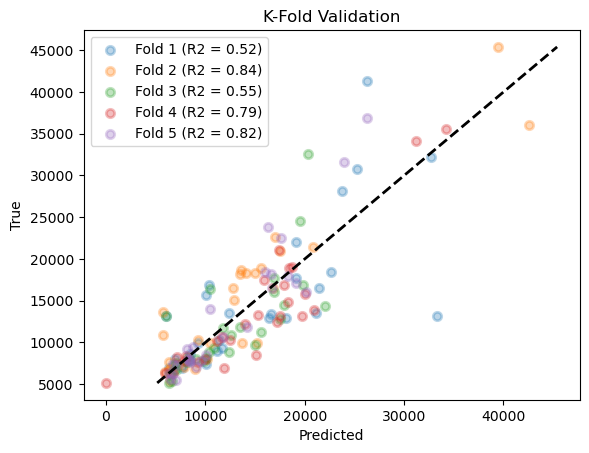

In [188]:
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [189]:
print('The Average R2 Score when using the Linear Regressor Model is ',np.mean(scores))

The Average R2 Score when using the Linear Regressor Model is  0.7052304265019489


Gradient Boosting

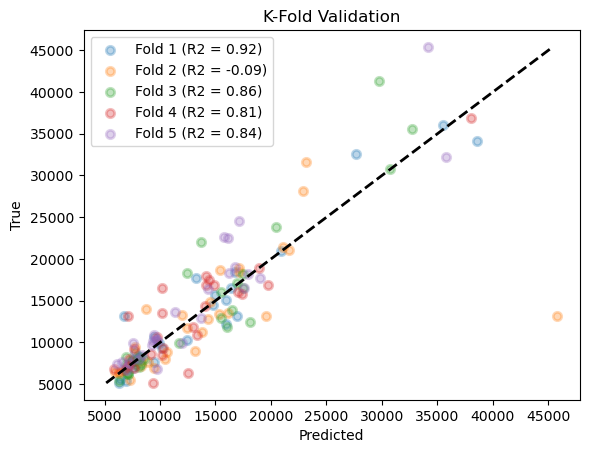

In [190]:
## call model
model = ensemble.GradientBoostingRegressor()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [191]:
print('The Average R2 Score when using the Linear Regressor Model is ',np.mean(scores))

The Average R2 Score when using the Linear Regressor Model is  0.6692079080875958


In [192]:
accuracies = model_selection.cross_val_score(
    estimator=model, X=X_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.34 %
Standard Deviation: 31.39 %


In [193]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

In [194]:
predicted = scalerY.inverse_transform( 
                  predicted.reshape(-1,1) ).reshape(-1)

#Principal Component Analysis

In [195]:
## PCA
pca = decomposition.PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)
## train 2d model
model_2d = ensemble.GradientBoostingRegressor()
model_2d.fit(X_train, y_train)

GradientBoostingRegressor()

In [196]:
# #Training set
# from matplotlib.colors import ListedColormap
# x_set, y_set = X_train, y_train
# x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
#                      np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
# plt.contourf(x1, x2, model_2D.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
#              alpha=0.75, cmap=ListedColormap(('red', 'green')))
# plt.xlim(x1.min(), x1.max())
# plt.ylim(x2.min(), x2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
#                 c=ListedColormap(('red', 'green'))(i), label=j)
# plt.title("Training Set")
# plt.show()

# #Testing set
# x_set, y_set = X_test, y_test
# x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
#                      np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
# plt.contourf(x1, x2, model_2D.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
#              alpha=0.75, cmap=ListedColormap(('red', 'green')))
# plt.xlim(x1.min(), x1.max())
# plt.ylim(x2.min(), x2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
#                 c=ListedColormap(('red', 'green'))(i), label=j)
# plt.title("Testing Set")
# plt.show()
